## Unsupervised Learning and Feature Selection/Transformation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')
# Loadind the required modules to read the data 
import pandas as pd
import numpy as np
from sklearn import mixture

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)  # TO set print options to suppress scientific notations

In [3]:
data= pd.read_csv("tit.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
def missing_check(data):
    missing_values = data.isnull().sum().sort_values(ascending = False)
    percentage_missing_values = (missing_values/len(data))*100
    print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing']))

In [8]:
missing_check(data)

             Missing values  % Missing
Cabin                   687  77.104377
Age                     177  19.865320
Embarked                  2   0.224467
Fare                      0   0.000000
Ticket                    0   0.000000
Parch                     0   0.000000
SibSp                     0   0.000000
Sex                       0   0.000000
Name                      0   0.000000
Pclass                    0   0.000000
Survived                  0   0.000000
PassengerId               0   0.000000


In [9]:
data["Age"]=data["Age"].fillna(data["Age"].median())
data["Embarked"]=data["Embarked"].fillna("S")

In [10]:
data["Family Size"]= data["SibSp"]+data["Parch"]+1
data=data.drop(["Name","Cabin","SibSp","Parch","Ticket"],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,1,0,3,male,22.0,7.2500,S,2
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,1


In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family Size    0
dtype: int64

In [12]:
dummies=pd.get_dummies(data[["Embarked","Sex"]],drop_first=True)
data=pd.concat([data,dummies],axis=1)
data=data.drop(["Sex","Embarked"],axis=1)
data_label=data["Survived"]
data.head()

,PassengerId,Survived,Pclass,Age,Fare,Family Size,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,22.0,7.2500,2,0,1,1
1,2,1,1,38.0,71.2833,2,0,0,0
2,3,1,3,26.0,7.9250,1,0,1,0
3,4,1,1,35.0,53.1000,2,0,1,0
4,5,0,3,35.0,8.0500,1,0,1,1


In [13]:
Y=data["Survived"]
data.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family Size,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,1.904602,0.086420,0.725028,0.647587
std,257.353842,0.486592,0.836071,13.019697,49.693429,1.613459,0.281141,0.446751,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,1.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,2.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,11.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.model_selection import train_test_split

def data_part(X, y, split_size) :
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = split_size)
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [15]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(data)
std_x = standardizer.transform(data)
std_data = pd.DataFrame(std_x,columns=data.columns)
std_data.head()

,PassengerId,Survived,Pclass,Age,Fare,Family Size,Embarked_Q,Embarked_S,Sex_male
0,-1.730108,-0.789272,0.827377,-0.565736,-0.502445,0.059160,-0.307562,0.615838,0.737695
1,-1.726220,1.266990,-1.566107,0.663861,0.786845,0.059160,-0.307562,-1.623803,-1.355574
2,-1.722332,1.266990,0.827377,-0.258337,-0.488854,-0.560975,-0.307562,0.615838,-1.355574
3,-1.718444,1.266990,-1.566107,0.433312,0.420730,0.059160,-0.307562,0.615838,-1.355574
4,-1.714556,-0.789272,0.827377,0.433312,-0.486337,-0.560975,-0.307562,0.615838,0.737695


In [16]:
X=std_data.drop("Survived",axis=1)
y=data["Survived"]

In [17]:
X_train, X_test, y_train, y_test=data_part(X,y,split_size=0.3)

(623, 8)
(268, 8)


In [18]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        
        ## Fit model 
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        
        ## Fit model_cv using 
        model_cv.fit(X,y)
        
        ## check best estimator 
        model = model_cv.best_estimator_
        
        print(model_cv.best_estimator_)
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

In [19]:
def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               Accuracy FOR TRAIN DATA
            =========================================''')
    print("Accuracy : ", accuracy_score(y_train, pred_train))
    
    print('''
            =========================================
               Accuracy FOR TEST DATA
            =========================================''')
    print("Accuracy : ", accuracy_score(y_test, pred_test))

In [20]:
X.describe()

,PassengerId,Pclass,Age,Fare,Family Size,Embarked_Q,Embarked_S,Sex_male
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.517004e-17,-2.031048e-16,3.841546e-16,-4.373606e-17,2.502051e-16,-4.017238e-16,-2.093350e-16,-4.059603e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-1.566107e+00,-2.224156e+00,-6.484217e-01,-5.609748e-01,-3.075623e-01,-1.623803e+00,-1.355574e+00
25%,-8.650540e-01,-3.693648e-01,-5.657365e-01,-4.891482e-01,-5.609748e-01,-3.075623e-01,-1.623803e+00,-1.355574e+00
50%,0.000000e+00,8.273772e-01,-1.046374e-01,-3.573909e-01,-5.609748e-01,-3.075623e-01,6.158384e-01,7.376951e-01
75%,8.650540e-01,8.273772e-01,4.333115e-01,-2.424635e-02,5.915988e-02,-3.075623e-01,6.158384e-01,7.376951e-01
max,1.730108e+00,8.273772e-01,3.891554e+00,9.667167e+00,5.640372e+00,3.251373e+00,6.158384e-01,7.376951e-01


## TASK I : K-Means Clustering and Soft Clustering

In [57]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=1234).fit(X)
    X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ #a Inertia: Sum of distances of samples to their closest cluster center


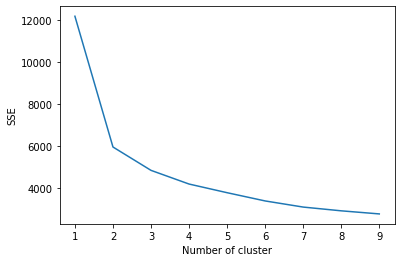

In [58]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [59]:
trace0=go.Scatter(type="scatter",
                   x=list(sse.keys()),
                  y=list(sse.values()))

data=[trace0]

layout = go.Layout(title = 'Number of Clusters Vs SSE ',xaxis=dict(title= 'Number of Clusters'),
                   yaxis=dict(title= 'SSE'))

    
fig = go.Figure(data=data, layout=layout)    
iplot(fig)

In [60]:
kmeans_object = KMeans(n_clusters=2,random_state=1234)
kmeans_object.fit(X)
kmeans_clusters = kmeans_object.predict(X)
kmeans_result = pd.DataFrame({"labels":data_label,
                              "kmeans_cluster":kmeans_clusters})
kmeans_result.head()

,labels,kmeans_cluster
0,0,1
1,1,1
2,1,1
3,1,0
4,0,1


In [61]:
kmeans_object.cluster_centers_

array([[ 0.04048502, -0.8452893 ,  0.41652322,  0.66204169,  0.56436614,
        -0.30756234,  0.38236234, -0.31298026,  6.60617761],
       [-0.01659117,  0.34640811, -0.17069543, -0.27131139, -0.23128296,
         0.12604216, -0.15669596,  0.12826248,  2.02531646]])

In [65]:
aic_tr=[]
aic_te=[]
bic_tr=[]
bic_te=[]
score_tr=[]
score_te=[]
for n in range(1,10):
    gmm_object=mixture.GaussianMixture(n,random_state=1234).fit(X_train) 
    gmm_clusters=gmm_object.predict(X_train)
    aic_tr.append(gmm_object.aic(X_train))
    bic_tr.append(gmm_object.bic(X_train))
    score_tr.append(gmm_object.score(X_train))
    aic_te.append(gmm_object.aic(X_test))
    bic_te.append(gmm_object.bic(X_test))
    score_te.append(gmm_object.score(X_test))

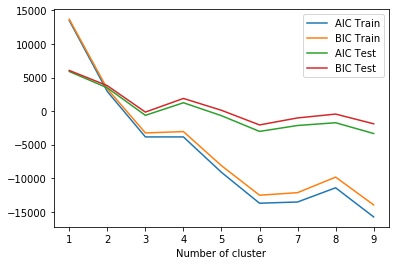

In [66]:
plt.figure()
plt.plot(list(range(1,10)),aic_tr,label="AIC Train")
plt.plot(list(range(1,10)),bic_tr,label="BIC Train")
plt.plot(list(range(1,10)),aic_te,label="AIC Test")
plt.plot(list(range(1,10)),bic_te,label="BIC Test")
plt.xlabel("Number of cluster")
plt.legend(loc='best')
plt.show()

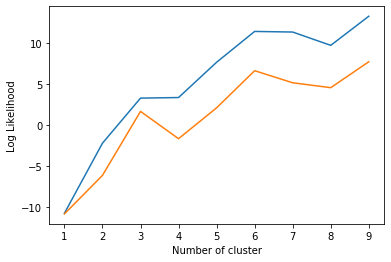

In [67]:
plt.plot(list(range(1,10)),score_tr,label="Score Train")
plt.plot(list(range(1,10)),score_te,label="Score Test")
plt.ylabel("Log Likelihood")
plt.xlabel("Number of cluster")
plt.show()

## TASK II : Feature Selection and Feature Transformation

In [21]:
# feature selection through decision tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
import pandas as pd
feature_importance = pd.DataFrame({'Feature':X.columns, 'Score':DT.feature_importances_})
print(feature_importance.sort_values('Score', ascending = False))

       Feature     Score
7     Sex_male  0.295231
0  PassengerId  0.219458
2          Age  0.145614
3         Fare  0.137457
1       Pclass  0.102613
4  Family Size  0.085146
5   Embarked_Q  0.011177
6   Embarked_S  0.003304


In [25]:
X_Selected= X[["Sex_male","PassengerId","Age","Fare","Pclass"]]

In [26]:
from sklearn.cluster import KMeans
sse_x = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=1234).fit(X)
    X_Selected["clusters"] = kmeans.labels_
    sse_x[k] = kmeans.inertia_ #a Inertia: Sum of distances of samples to their closest cluster center


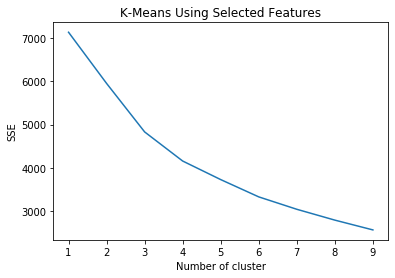

In [27]:
plt.figure()
plt.plot(list(sse_x.keys()), list(sse_x.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("K-Means Using Selected Features")
plt.show()

In [73]:
trace0=go.Scatter(type="scatter",
                   x=list(sse_x.keys()),
                  y=list(sse_x.values()))

data=[trace0]

layout = go.Layout(title = 'Number of Clusters Vs SSE ',xaxis=dict(title= 'Number of Clusters'),
                   yaxis=dict(title= 'SSE'))

    
fig = go.Figure(data=data, layout=layout)    
iplot(fig)

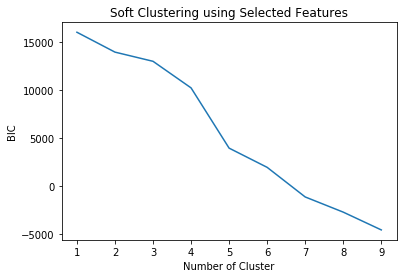

In [32]:
bic_DT=[]
for n in range(1,10):
    gmm_object_DT=mixture.GaussianMixture(n).fit(X_Selected) 
    gmm_clusters_DT=gmm_object_DT.predict(X_Selected)
    bic_DT.append(gmm_object_DT.bic(X_Selected))


    
plt.plot(list(range(1,10)),bic_DT,label="BIC on Selected Features")
plt.ylabel("BIC")
plt.title("Soft Clustering using Selected Features")
plt.xlabel("Number of Cluster")
plt.show()


In [29]:
X_train_DT,X_test_DT, y_train_DT, y_test_DT=data_part(X_Selected,Y,split_size=0.2)

(712, 6)
(179, 6)


In [30]:
NN_DT= MLPClassifier()
NN_DT.fit(X_train_DT,y_train_DT)
nn_tr_pred_DT= NN_DT.predict(X_train_DT)
nn_te_pred_DT= NN_DT.predict(X_test_DT)
training_acc_nn_DT= accuracy_score(y_train_DT,nn_tr_pred_DT)
testing_acc_nn_DT= accuracy_score(y_test_DT,nn_te_pred_DT)
print("Training Accuracy : Neural Network  Selected Features=",(training_acc_nn_DT)*100,"%")
print("Test Accuracy : Neural Network Selected Features =",(testing_acc_nn_DT)*100,"%")

Training Accuracy : Neural Network  Selected Features= 83.98876404494382 %
Test Accuracy : Neural Network Selected Features = 84.91620111731844 %


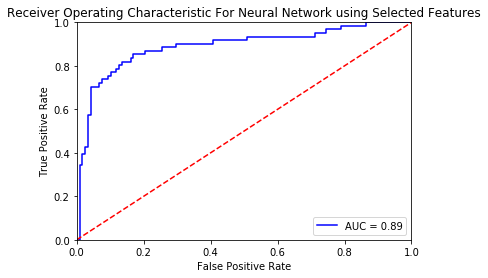

In [31]:
probs_NN_DT = NN_DT.predict_proba(X_test_DT)
preds_NN_DT = probs_NN_DT[:,1]
fpr_NN_DT, tpr_NN_DT, threshold_NN_DT = metrics.roc_curve(y_test_DT, preds_NN_DT)
roc_auc_NN_DT = metrics.auc(fpr_NN_DT, tpr_NN_DT)


plt.title('Receiver Operating Characteristic For Neural Network using Selected Features')
plt.plot(fpr_NN_DT, tpr_NN_DT, 'b', label = 'AUC = %0.2f' % roc_auc_NN_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## TASK III and TASK IV : Applying Clustering and Neural Network on PCA,ICA and RCA

## PCA ,Clustering and Neural Network

In [33]:
# using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.explained_variance_ratio_

array([0.22484523, 0.19421325, 0.17797003, 0.12347826, 0.09953663,
       0.08426527, 0.05157833, 0.044113  ])

In [35]:
# as can be seen from above ratio top 7 companents explain 94% variance in data
new_pca = PCA(n_components = 7)
pca_transformed = new_pca.fit_transform(X)
new_pca.explained_variance_ratio_

array([0.22484523, 0.19421325, 0.17797003, 0.12347826, 0.09953663,
       0.08426527, 0.05157833])

In [36]:
pca_transformed

array([[-1.22727577, -0.64536378,  0.49214498, ...,  0.56510261,
        -0.14209336,  0.07120668],
       [ 2.11323979,  1.48043867,  0.05303301, ..., -0.45608326,
        -0.35331955, -0.98885418],
       [-0.70907748, -0.06073563,  0.69322372, ..., -1.4125468 ,
        -0.48774897,  0.08641445],
       ...,
       [-0.17915711, -0.26071785,  1.47472666, ..., -1.15575361,
         0.85491018, -0.19680639],
       [ 0.96278178,  0.42447719, -1.21815327, ...,  0.76283911,
        -0.99943084, -0.9681483 ],
       [-1.52033003,  2.66308532, -1.8724848 , ...,  0.53438376,
         0.72883592,  0.84325509]])

In [42]:
from sklearn.cluster import KMeans
sse_pca = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=1234).fit(pca_transformed)
    X["pca_clusters"] = kmeans.labels_
    sse_pca[k] = kmeans.inertia_ #a Inertia: Sum of distances of samples to their closest cluster center


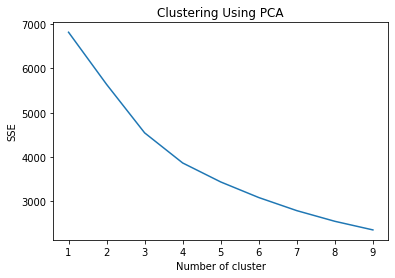

In [43]:
plt.figure()
plt.plot(list(sse_pca.keys()), list(sse_pca.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Clustering Using PCA")
plt.show()

In [44]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=data_part(pca_transformed,Y,split_size=0.3)

(623, 7)
(268, 7)


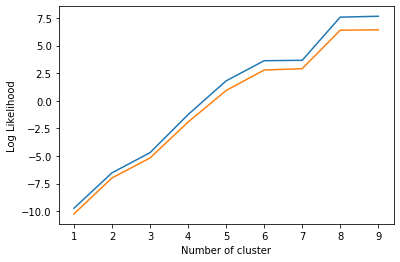

In [45]:
score_tr_pca=[]
score_te_pca=[]
for n in range(1,10):
    gmm_object_pca=mixture.GaussianMixture(n).fit(X_train_pca) 
    gmm_clusters_pca=gmm_object_pca.predict(X_train_pca)
    score_tr_pca.append(gmm_object_pca.score(X_train_pca))
    score_te_pca.append(gmm_object_pca.score(X_test_pca))


    
plt.plot(list(range(1,10)),score_tr_pca,label="Score Train")
plt.plot(list(range(1,10)),score_te_pca,label="Score Test")
plt.ylabel("Log Likelihood")
plt.xlabel("Number of cluster")
plt.show()


In [82]:
NN_pca= MLPClassifier()
NN_pca.fit(X_train_pca,y_train_pca)
nn_tr_pred_pca= NN_pca.predict(X_train_pca)
nn_te_pred_pca= NN_pca.predict(X_test_pca)
training_acc_nn_pca= accuracy_score(y_train_pca,nn_tr_pred_pca)
testing_acc_nn_pca= accuracy_score(y_test_pca,nn_te_pred_pca)
print("Training Accuracy : Neural Network  PCA=",(training_acc_nn_pca)*100,"%")
print("Test Accuracy : Neural Network PCA =",(testing_acc_nn_pca)*100,"%")

Training Accuracy : Neural Network  PCA= 84.26966292134831 %
Test Accuracy : Neural Network PCA = 79.8507462686567 %


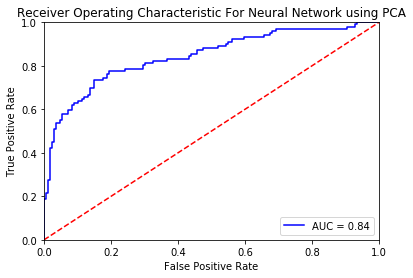

In [83]:
probs_NN_pca = NN_pca.predict_proba(X_test_pca)
preds_NN_pca = probs_NN_pca[:,1]
fpr_NN_pca, tpr_NN_pca, threshold_NN_pca = metrics.roc_curve(y_test_pca, preds_NN_pca)
roc_auc_NN_pca = metrics.auc(fpr_NN_pca, tpr_NN_pca)


plt.title('Receiver Operating Characteristic For Neural Network using PCA')
plt.plot(fpr_NN_pca, tpr_NN_pca, 'b', label = 'AUC = %0.2f' % roc_auc_NN_pca)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ICA ,Clustering and Neural Network

In [84]:
# using ICA to find out important dimmensions from the dataset
from sklearn.decomposition import FastICA

ica = FastICA()
kmeans = KMeans()

n_components = []
ica_clusters = []
scores_ica = []

for n in range(2,14):
    ica.set_params(n_components = n)
    X_ica = ica.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_ica)
        n_components.append(n)
        ica_clusters.append(k)
        scores_ica.append(kmeans.inertia_)

In [85]:
scores_vs_clust = pd.DataFrame({'n_components':n_components, 'n_clusters':ica_clusters, 'Scores':scores_ica})
print(scores_vs_clust.sort_values('Scores'))

    n_components  n_clusters    Scores
7              2           9  0.006000
6              2           8  0.017799
5              2           7  0.032511
4              2           6  0.092063
15             3           9  0.182657
..           ...         ...       ...
73            11           3  8.166869
72            11           2  9.000000
88            13           2  9.000000
64            10           2  9.000000
80            12           2  9.099160

[96 rows x 3 columns]


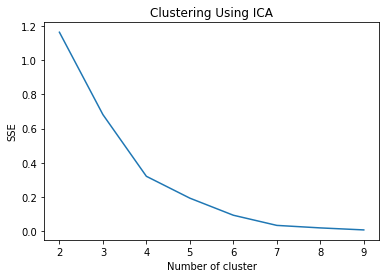

In [86]:
plt.plot((list(range(2,10))),scores_vs_clust[scores_vs_clust["n_components"]==2]["Scores"])
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Clustering Using ICA")
plt.show()

In [87]:
ica=FastICA()
ica.set_params(n_components = 2)
X_ica_final = ica.fit_transform(X)
kmeans_ica = KMeans(n_clusters=4,random_state=1234)
kmeans_ica.fit(X_ica_final)
kmeans_clusters_ica = kmeans_ica.predict(X_ica_final)
kmeans_result_ica = pd.DataFrame({"labels":data_label,
                              "kmeans_cluster":kmeans_clusters_ica})
kmeans_result_ica.head()

,labels,kmeans_cluster
0,0,1
1,1,1
2,1,3
3,1,2
4,0,1


In [88]:
X_train_ica, X_test_ica, y_train_ica, y_test_ica=data_part(X_ica_final,Y,split_size=0.3)

(623, 2)
(268, 2)


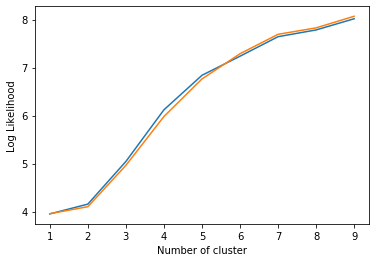

In [89]:
score_tr_ica=[]
score_te_ica=[]
for n in range(1,10):
    gmm_object_ica=mixture.GaussianMixture(n).fit(X_train_ica) 
    gmm_clusters_ica=gmm_object_ica.predict(X_train_ica)
    score_tr_ica.append(gmm_object_ica.score(X_train_ica))
    score_te_ica.append(gmm_object_ica.score(X_test_ica))


    
plt.plot(list(range(1,10)),score_tr_ica,label="Score Train")
plt.plot(list(range(1,10)),score_te_ica,label="Score Test")
plt.ylabel("Log Likelihood")
plt.xlabel("Number of cluster")
plt.show()


In [90]:
NN_ica= MLPClassifier()
NN_ica.fit(X_train_ica,y_train_ica)
nn_tr_pred_ica= NN_ica.predict(X_train_ica)
nn_te_pred_ica= NN_ica.predict(X_test_ica)
training_acc_nn_ica= accuracy_score(y_train_ica,nn_tr_pred_ica)
testing_acc_nn_ica= accuracy_score(y_test_ica,nn_te_pred_ica)
print("Training Accuracy : Neural Network ICA =",(training_acc_nn_ica)*100,"%")
print("Test Accuracy : Neural Network ICA =",(testing_acc_nn_ica)*100,"%")

Training Accuracy : Neural Network ICA = 70.14446227929373 %
Test Accuracy : Neural Network ICA = 66.04477611940298 %


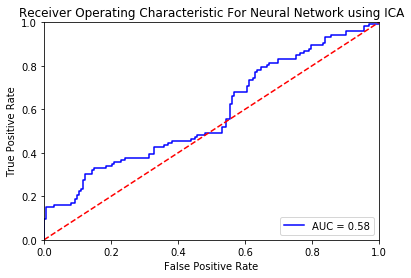

In [91]:
probs_NN_ica = NN_ica.predict_proba(X_test_ica)
preds_NN_ica = probs_NN_ica[:,1]
fpr_NN_ica, tpr_NN_ica, threshold_NN_ica = metrics.roc_curve(y_test_ica, preds_NN_ica)
roc_auc_NN_ica = metrics.auc(fpr_NN_ica, tpr_NN_ica)


plt.title('Receiver Operating Characteristic For Neural Network using ICA')
plt.plot(fpr_NN_ica, tpr_NN_ica, 'b', label = 'AUC = %0.2f' % roc_auc_NN_ica)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## RCA ,Clustering and Neural Network

In [92]:
from sklearn.random_projection import GaussianRandomProjection

RCA = GaussianRandomProjection()
kmeans = KMeans()

n_comp_RCA = []
n_clust_RCA = []
Scores_RCA = []

for n in range(2,14):
    RCA.set_params(n_components = n)
    X_RCA = RCA.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_RCA)
        n_comp_RCA.append(n)
        n_clust_RCA.append(k)
        Scores_RCA.append(kmeans.inertia_)

In [93]:
scores_vs_clust_RCA = pd.DataFrame({'n_components':n_comp_RCA, 'n_clusters':n_clust_RCA, 'Scores':Scores_RCA})
print(scores_vs_clust_RCA.sort_values('Scores'))

    n_components  n_clusters        Scores
7              2           9    461.098863
6              2           8    514.050995
5              2           7    595.892728
4              2           6   1044.892566
23             4           9   1424.720681
..           ...         ...           ...
56             9           2  11583.908430
33             6           3  12188.744089
72            11           2  12689.564246
40             7           2  12811.726006
32             6           2  15919.165889

[96 rows x 3 columns]


In [94]:
scores_vs_clust_RCA.groupby("n_components")["Scores"].mean().reset_index().sort_values("Scores")

,n_components,Scores
0,2,2243.880612
3,5,3493.422265
2,4,3675.569246
1,3,4088.328822
8,10,5108.664044
11,13,5292.457358
6,8,5505.239242
10,12,5628.232783
7,9,5884.203958
5,7,5884.465513


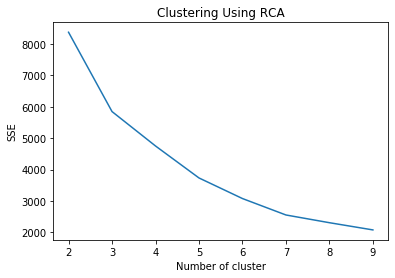

In [95]:
plt.plot((list(range(2,10))),scores_vs_clust_RCA[scores_vs_clust_RCA["n_components"]==3]["Scores"])
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Clustering Using RCA")
plt.show()

In [96]:
RCA = GaussianRandomProjection()
RCA.set_params(n_components = 3)
X_rca_final = RCA.fit_transform(X)
kmeans_rca = KMeans(n_clusters=5,random_state=1234)
kmeans_rca.fit(X_rca_final)
kmeans_clusters_rca = kmeans_rca.predict(X_rca_final)
kmeans_result_rca = pd.DataFrame({"labels":data_label,
                              "kmeans_cluster":kmeans_clusters_rca})
kmeans_result_rca.head()

,labels,kmeans_cluster
0,0,4
1,1,3
2,1,4
3,1,2
4,0,4


In [97]:
X_train_rca, X_test_rca, y_train_rca, y_test_rca=data_part(X_rca_final,Y,split_size=0.3)

(623, 3)
(268, 3)


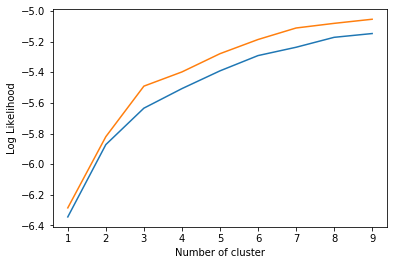

In [98]:
score_tr_rca=[]
score_te_rca=[]
for n in range(1,10):
    gmm_object_rca=mixture.GaussianMixture(n).fit(X_train_rca) 
    gmm_clusters_rca=gmm_object_rca.predict(X_train_rca)
    score_tr_rca.append(gmm_object_rca.score(X_train_rca))
    score_te_rca.append(gmm_object_rca.score(X_test_rca))


    
plt.plot(list(range(1,10)),score_tr_rca,label="Score Train")
plt.plot(list(range(1,10)),score_te_rca,label="Score Test")
plt.ylabel("Log Likelihood")
plt.xlabel("Number of cluster")
plt.show()


In [99]:
NN_rca= MLPClassifier()
NN_rca.fit(X_train_rca,y_train_rca)
nn_tr_pred_rca= NN_rca.predict(X_train_rca)
nn_te_pred_rca= NN_rca.predict(X_test_rca)
training_acc_nn_rca= accuracy_score(y_train_rca,nn_tr_pred_rca)
testing_acc_nn_rca= accuracy_score(y_test_rca,nn_te_pred_rca)

In [100]:
print("Training Accuracy : Neural Network RCA =",(training_acc_nn_rca)*100,"%")
print("Test Accuracy : Neural Network RCA =",(testing_acc_nn_rca)*100,"%")

Training Accuracy : Neural Network RCA = 73.35473515248796 %
Test Accuracy : Neural Network RCA = 72.76119402985076 %


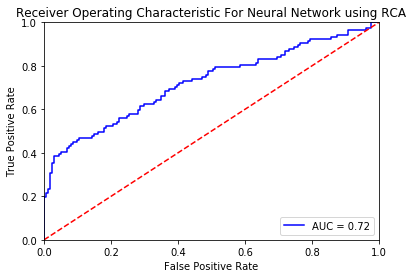

In [101]:
probs_NN_rca = NN_rca.predict_proba(X_test_rca)
preds_NN_rca = probs_NN_rca[:,1]
fpr_NN_rca, tpr_NN_rca, threshold_NN_rca = metrics.roc_curve(y_test_rca, preds_NN_rca)
roc_auc_NN_rca = metrics.auc(fpr_NN_rca, tpr_NN_rca)


plt.title('Receiver Operating Characteristic For Neural Network using RCA')
plt.plot(fpr_NN_rca, tpr_NN_rca, 'b', label = 'AUC = %0.2f' % roc_auc_NN_rca)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## TASK V : Neural Network on Clustering

In [102]:
X_Clusters=X["clusters"]

In [103]:
X_train_clust, X_test_clust, y_train_clust, y_test_clust=data_part(X_Clusters,Y,split_size=0.3)

(623,)
(268,)


In [104]:
NN_clust= MLPClassifier()
NN_clust.fit(pd.DataFrame(X_train_clust),y_train_clust)
nn_tr_pred_clust= NN_clust.predict(pd.DataFrame(X_train_clust))
nn_te_pred_clust= NN_clust.predict(pd.DataFrame(X_test_clust))
training_acc_nn_clust= accuracy_score(y_train_clust,nn_tr_pred_clust)
testing_acc_nn_clust= accuracy_score(y_test_clust,nn_te_pred_clust)

In [107]:
print("Training Accuracy : Neural Network using Clusters as features =",(training_acc_nn_clust)*100,"%")
print("Test Accuracy : Neural Network using Clusters as features =",(testing_acc_nn_clust)*100,"%")

Training Accuracy : Neural Network using Clusters as features = 70.30497592295345 %
Test Accuracy : Neural Network using Clusters as features = 76.11940298507463 %


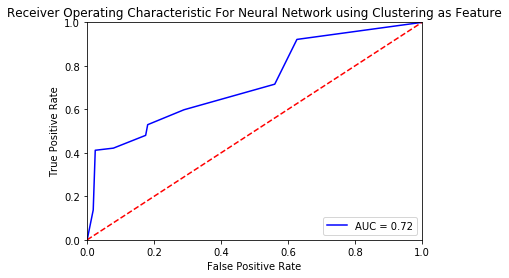

In [106]:
probs_NN_cl = NN_clust.predict_proba(pd.DataFrame(X_test_clust))
preds_NN_cl = probs_NN_cl[:,1]
fpr_NN_cl, tpr_NN_cl, threshold_NN_cl = metrics.roc_curve(y_test_clust, preds_NN_cl)
roc_auc_NN_cl = metrics.auc(fpr_NN_cl, tpr_NN_cl)


plt.title('Receiver Operating Characteristic For Neural Network using Clustering as Feature')
plt.plot(fpr_NN_cl, tpr_NN_cl, 'b', label = 'AUC = %0.2f' % roc_auc_NN_cl)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()